<a href="https://colab.research.google.com/github/RohithR0103/Task3/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset (replace 'path/to/spam_dataset.csv' with the actual path)
df = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Explore the dataset
print(df.head())
print(df.info())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
m

In [ ]:
# Drop unnecessary columns and rename columns if needed
df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'text'})

# Convert labels to binary (0 for ham, 1 for spam)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split the data into features (X) and target variable (y)
X = df['text']
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Use CountVectorizer to convert text into a matrix of token counts
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [ ]:
# Initialize and train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)


MultinomialNB()

In [ ]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Accuracy: 0.98

Confusion Matrix:
[[963   2]
 [ 16 134]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



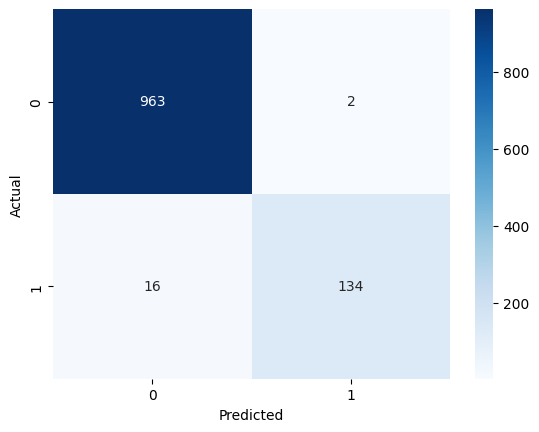

In [ ]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
new_emails = [
    "Congratulations! You've won a free vacation.",
    "Hello, let's schedule a meeting for next week.",
    "Claim your prize now! You're the lucky winner!"
]
new_emails_vectorized = vectorizer.transform(new_emails)

# Predict labels for new emails
new_emails_predictions = classifier.predict(new_emails_vectorized)

# Display predictions for new emails
for email, prediction in zip(new_emails, new_emails_predictions):
    spam_label = "Spam" if prediction == 1 else "Not Spam"
    print(f"Email: {email}\nPrediction: {spam_label}\n")

Email: Congratulations! You've won a free vacation.
Prediction: Spam

Email: Hello, let's schedule a meeting for next week.
Prediction: Not Spam

Email: Claim your prize now! You're the lucky winner!
Prediction: Spam

